# TP : PCA, NMF, ICA 

### 1) Étudier et tester le script pca_nmf_faces.py. Analyser le type de décomposition obtenu par NMF en comparaison avec celui obtenu par PCA. 

In [11]:
#  License: BSD
#  -*- coding: utf-8 -*-

#  Authors: Vlad Niculae, Alexandre Gramfort, Slim Essid


from time import time

import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import numpy as np
from numpy.random import RandomState
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import decomposition
from sklearn.datasets import fetch_olivetti_faces

# -- Prepare data and define utility functions --------------------------------

n_row, n_col = 2, 5
n_components = n_row * n_col
image_shape = (64, 64)
rng = RandomState(0)

# Load faces data
dataset = fetch_olivetti_faces(shuffle=True, random_state=rng)
faces = dataset.data

n_samples, n_features = faces.shape

# global centering
faces_centered = faces - faces.mean(axis=0, dtype=np.float64)

print ("Dataset consists of %d faces" % n_samples)


def plot_gallery(title, images):
    """Plot images as gallery"""
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        comp = comp.reshape(image_shape)
        vmax = comp.max()
        vmin = comp.min()
        dmy = np.nonzero(comp < 0)
        if len(dmy[0]) > 0:
            yz, xz = dmy
        comp[comp < 0] = 0

        plt.imshow(comp, cmap=plt.cm.gray, vmax=vmax, vmin=vmin)

        if len(dmy[0]) > 0:
            plt.plot(xz, yz, 'r,', hold=True)
            print(len(dmy[0]), "negative-valued pixels")

        plt.xticks(())
        plt.yticks(())

    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

# Plot a sample of the input data
#plot_gallery("First Olivetti faces", faces[:n_components])

#plot_gallery("First centered Olivetti faces", faces_centered[:n_components])

# -- Decomposition methods ----------------------------------------------------

# List of the different estimators and whether to center the data
cv_score_pca = []
cv_score_nmf = []
for n_components in range(5,50,5):
    estimators = [
        ('pca', 'Eigenfaces - PCA',
         decomposition.PCA(n_components=n_components, whiten=True),
         True),

        ('nmf', 'Non-negative components - NMF',
         decomposition.NMF(n_components=n_components, init=None, tol=1e-6,
                           sparseness=None, max_iter=1000),
         False)
    ]

    # -- Transform and classify ---------------------------------------------------

    labels = dataset.target
    X = faces
    X_ = faces_centered

    for shortname, name, estimator, center in estimators:
    #     if shortname != 'nmf':
    #         continue
        print("Extracting the top %d %s..." % (n_components, name))
        t0 = time()

        data = X
        if center:
            data = X_
        print(data.shape)
        data = estimator.fit_transform(data)
        print(data.shape)

        clf = LinearDiscriminantAnalysis()
        scores = cross_val_score(clf, data, labels, cv=5)
        
        if shortname == "pca":
            cv_score_pca.append(np.mean(scores))
        if shortname == "nmf":
            cv_score_nmf.append(np.mean(scores))
        
        train_time = (time() - t0)
        print("done in %0.3fs" % train_time)

        components_ = estimator.components_

        #plot_gallery('%s - Train time %.1fs' % (name, train_time),components_[:n_components])


Dataset consists of 400 faces
Extracting the top 5 Eigenfaces - PCA...
(400, 4096)
(400, 5)
done in 0.119s
Extracting the top 5 Non-negative components - NMF...
(400, 4096)
(400, 5)
done in 18.574s
Extracting the top 10 Eigenfaces - PCA...
(400, 4096)
(400, 10)
done in 0.125s
Extracting the top 10 Non-negative components - NMF...
(400, 4096)
(400, 10)
done in 19.465s
Extracting the top 15 Eigenfaces - PCA...
(400, 4096)
(400, 15)
done in 0.125s
Extracting the top 15 Non-negative components - NMF...
(400, 4096)
(400, 15)
done in 22.396s
Extracting the top 20 Eigenfaces - PCA...
(400, 4096)
(400, 20)
done in 0.156s
Extracting the top 20 Non-negative components - NMF...
(400, 4096)
(400, 20)
done in 23.516s
Extracting the top 25 Eigenfaces - PCA...
(400, 4096)
(400, 25)
done in 0.179s
Extracting the top 25 Non-negative components - NMF...
(400, 4096)
(400, 25)
done in 27.412s
Extracting the top 30 Eigenfaces - PCA...
(400, 4096)
(400, 30)
done in 0.238s
Extracting the top 30 Non-negative 

NameError: name 'ranges' is not defined

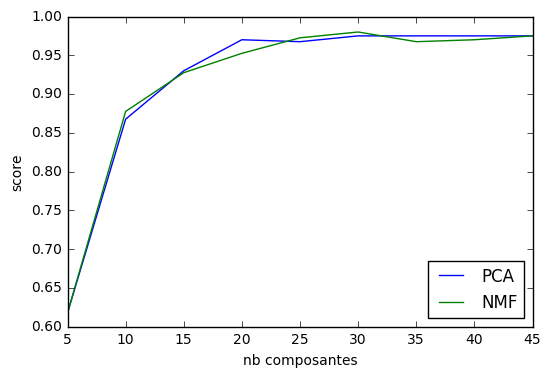

In [14]:
plt.plot(range(5,50,5), cv_score_pca, label="PCA")
plt.plot(range(5,50,5), cv_score_nmf, label="NMF")
plt.xlabel("nb composantes")
plt.ylabel("score")
plt.legend(loc="best")
plt.show()

In [15]:
# Author: Olivier Grisel <olivier.grisel@ensta.org> # License: Simplified BSD
from time import time 
from sklearn.feature_extraction import text 
from sklearn import decomposition
from sklearn import datasets

n_samples = 1000
n_features = 900
n_topics = 10 
n_top_words = 20

# Load the 20 newsgroups dataset and vectorize it using the most common word 
# frequency with TF-IDF weighting (without top 5% stop words)

t0 = time() 
print ("Loading dataset and extracting TF-IDF features...")
dataset = datasets.fetch_20newsgroups(data_home='c:/tmp/',shuffle=True, random_state=1)
vectorizer = text.CountVectorizer(max_df=0.95, max_features=n_features) 
counts = vectorizer.fit_transform(dataset.data[:n_samples]) 
tfidf = text.TfidfTransformer().fit_transform(counts) 
print ("done in %0.3fs." % (time() - t0))
# Fit the NMF model

print ("Fitting the NMF model on with n_samples=%d and n_features=%d..." % (n_samples, n_features))
nmf = decomposition.NMF(n_components=n_topics).fit(tfidf) 
print ("done in %0.3fs." % (time() - t0))

# Inverse the vectorizer vocabulary to be able
feature_names = vectorizer.get_feature_names()
for topic_idx, topic in enumerate(nmf.components_): 
    print("Topic #%d:" % topic_idx)
    print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

Loading dataset and extracting TF-IDF features...
done in 100.671s.
Fitting the NMF model on with n_samples=1000 and n_features=900...
done in 101.160s.
Topic #0:
the of in and on was to as at is which by were one with for they that when two

Topic #1:
chip clipper key the to encryption keys government be will this public as is or of can that it use

Topic #2:
is that of to not are and the we in as be people they it this there or god their

Topic #3:
edu university host posting cs nntp of re in article cc writes reply distribution washington cwru state mit for anyone

Topic #4:
com hp in article writes inc netcom corp stratus re sun posting nntp host dec ca jim org that corporation

Topic #5:
he his was to and him that who the had my in it but year this ca me team be

Topic #6:
uk ac co of university ___ dc posting host nntp thanks __ sorry college it please where return sun writes

Topic #7:
you to it your my have can if do and that car get like with don on what just so

Topic #8:
nas

## Séparation de sources audio par ICA : 

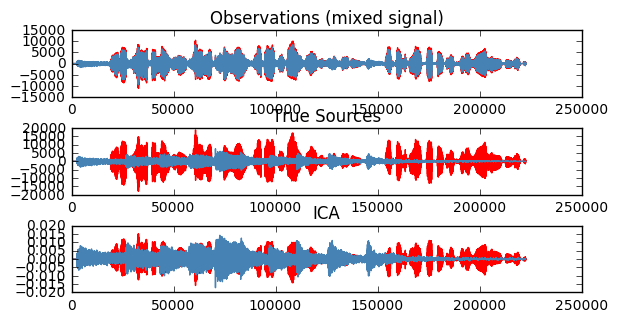

In [62]:
#  -*- coding: utf-8 -*-

# Author: Slim Essid

import wave
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt
import numpy as np

from sklearn import decomposition

# -- Read audio data ----------------------------------------------------------


def wavread(filename):
    """Read .wav file"""
    wf = wave.open(filename)
    s = np.fromstring(wf.readframes(wf.getnframes()), dtype=np.int16)
    wf.close()
    return s


def wavwrite(filename, s, nchannels=1):
    """Write .wav file"""
    wf = wave.open(filename, 'wb')
    wf.setnchannels(nchannels)
    wf.setsampwidth(2)
    wf.setframerate(32000)
    s = s / np.max(np.abs(s)) * 2 ** 14  # normalise arbitrarily
    wf.writeframes(s.astype(np.int16).tostring())
    wf.close()

s1 = wavread('./snd/es02.wav')
s2 = wavread('./snd/si01.wav')

# -- Create stereo mix --------------------------------------------------------

nsmp = min(len(s1), len(s2))
s1 = s1[:nsmp]
s2 = s2[:nsmp]
S = np.c_[s1, s2]
# Mixing matrix
A = np.array([[0.6, 0.5],
             [0.4, 0.5]])
# Do the mix
X = S.dot(A)
# Write mix file
x = np.zeros(2 * nsmp)
x[::2] = X[:, 0]
x[1::2] = X[:, 1]
wavwrite('./snd/mix.wav', x, nchannels=2)

# -- ICA source separation ----------------------------------------------------

ica = FastICA(n_components=2)
x_ica = ica.fit_transform(X)

# Visualise sources
plt.figure()

models = [X, S, x_ica]
names = ['Observations (mixed signal)',
         'True Sources', "ICA"]
colors = ['red', 'steelblue']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.show()

# Write audio sources
x_1 = np.zeros(2*nsmp)
x_2 = np.zeros(2*nsmp)

x_1[::2] = x_ica[:, 0]
x_2[::2] = x_ica[:, 1]
wavwrite('./snd/ica_1.wav', x_1, nchannels=2)
wavwrite('./snd/ica_2.wav', x_2, nchannels=2)
